In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

## 1. 了解數據

In [2]:
print("Size of train set:",df_train.shape)
print("Size of test set:",df_test.shape)

Size of train set: (891, 12)
Size of test set: (418, 11)


In [3]:
# 合併數據
data = pd.concat([df_train,df_test], axis=0).reset_index(drop=True)
train = data[:891]
test = data[891:]
print("Full size of data:",data.shape)

Full size of data: (1309, 12)


In [4]:
# 檢查數據有無缺失值及數據類型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


##### 其中 Age, Fare, Cabin, Embarked 皆有缺失值，Cabin 缺失值狀況嚴重

### 查看各個特徵與標籤之間的關係

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

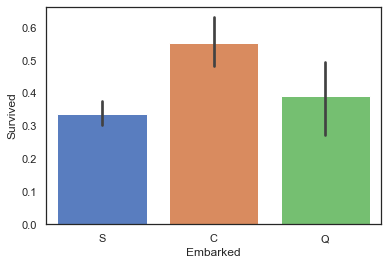

In [5]:
# Embarked vs Survived
sns.barplot(data=train, x='Embarked', y='Survived')

##### S(英國) C(法國) Q(紐西蘭)，在法國登船有比較高的存活率

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

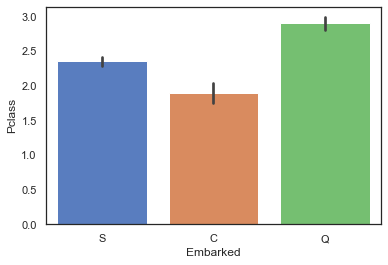

In [6]:
# 猜測：在法國登船存活率高，是不是在此登船的艙等比較高
sns.barplot(x='Embarked', y='Pclass', data=train)

##### 猜想正確，在法國登船的人平均艙等比較高

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

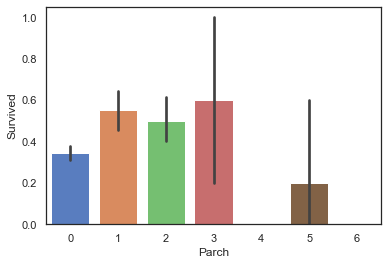

In [7]:
# Parch vs Survived
sns.barplot(x='Parch', y='Survived', data=train)

##### 乘客有1-3人同行的生存率較高

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

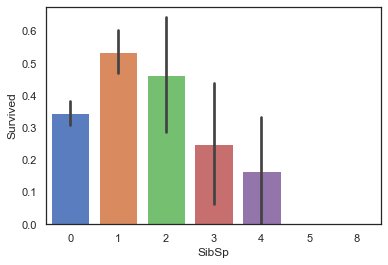

In [8]:
# SibSp vs Survived
sns.barplot(x='SibSp', y='Survived', data=train)

##### 乘客有1-2個同輩陪同生存率較高

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

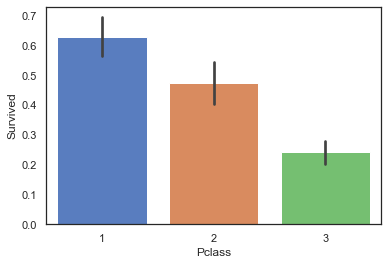

In [9]:
# Pclass vs Survived
sns.barplot(x='Pclass', y='Survived', data=train)

##### 艙等高存活率高

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

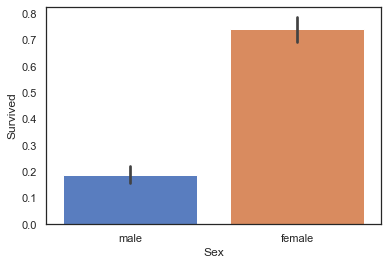

In [10]:
# Sex vs Survived
sns.barplot(x='Sex', y='Survived', data=train)

##### 女性存活率明顯大於男性

<AxesSubplot:xlabel='Age', ylabel='Survived'>

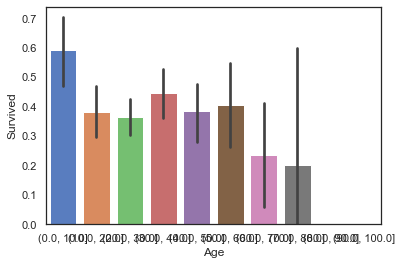

In [11]:
# Age vs Survived
bins = np.linspace(0,100,11)
age_cut = pd.cut(train['Age'],bins=bins)
sns.barplot(x=age_cut, y=train['Survived'])

##### 乘客年齡在 0~10歲生存率較高

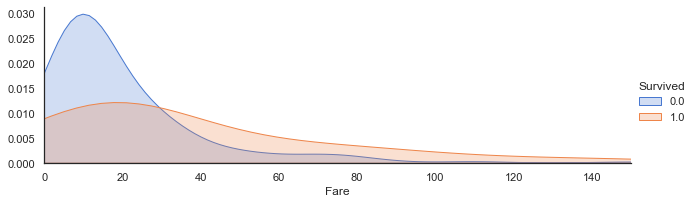

In [12]:
# Fare vs Survived
fareFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
fareFacet.map(sns.kdeplot,'Fare',shade=True)
fareFacet.set(xlim=(0,150))
fareFacet.add_legend()

##### 票價低於18的死亡率較高，票價越高存活率越高

In [13]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. 數據清洗

In [14]:
# Cabin 缺失值填補
data['Cabin'] = data['Cabin'].fillna('U')
data['Cabin']

0          U
1        C85
2          U
3       C123
4          U
        ... 
1304       U
1305    C105
1306       U
1307       U
1308       U
Name: Cabin, Length: 1309, dtype: object

In [15]:
# Embarked 缺失值填補
# 選機率大的登船地點
print(data['Embarked'].value_counts())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [16]:
# Fare 缺失值填補
# 利用相同艙等，相同登船地點的平均票價做填補

print(data[data['Fare'].isnull()])
data['Fare'] = data['Fare'].fillna(data.groupby(['Pclass','Embarked'])['Fare'].mean()[3,'S'])

      PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
1043         1044       NaN       3  Storey, Mr. Thomas  male  60.5      0   

      Parch Ticket  Fare Cabin Embarked  
1043      0   3701   NaN     U        S  


## 3. 特徵工程

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Mme               1
the Countess      1
Sir               1
Jonkheer          1
Lady              1
Dona              1
Don               1
Name: title, dtype: int64


<AxesSubplot:xlabel='title', ylabel='Survived'>

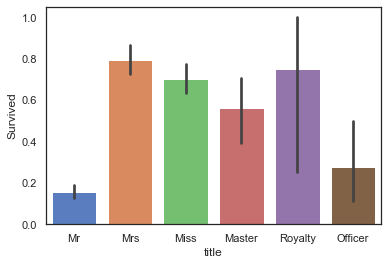

In [17]:
# Name 當中有頭銜(title)訊息
data['title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

print(data['title'].value_counts())

titleDict = {}
titleDict['Mr'] = 'Mr'
titleDict['Miss'] = 'Miss'
titleDict['Mrs'] = 'Mrs'
titleDict['Master'] = 'Master'
titleDict['Dr'] = 'Officer'
titleDict['Rev'] = 'Officer'
titleDict['Col'] = 'Officer'
titleDict['Major'] = 'Officer'
titleDict['Ms'] = 'Mrs'
titleDict['Mlle'] = 'Miss'
titleDict['Sir'] = 'Royalty'
titleDict['Jonkheer'] = 'Master'
titleDict['Dona'] = 'Royalty'
titleDict['Mme'] = 'Mrs'
titleDict['the Countess'] = 'Royalty'
titleDict['Don'] = 'Royalty'
titleDict['Lady'] = 'Royalty'
titleDict['Capt'] = 'Officer'

data['title'] = data['title'].map(titleDict)
data['title'].value_counts()

sns.barplot(x='title', y='Survived', data=data)

##### 頭銜為 Mr 和 Officer 的存活率明顯較低

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

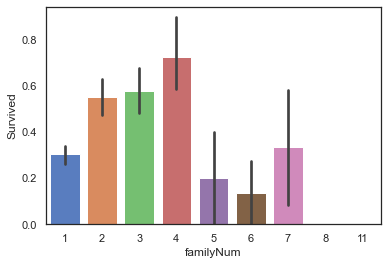

In [18]:
# 利用 Parch 和 SibSp 加總作為 familySize的新特徵(分 大中小)
# 先看加總的分佈如何
data['familyNum'] = data['Parch']+data['SibSp']+1
sns.barplot(x='familyNum', y='Survived', data=data)

0    790
1    437
2     82
Name: familySize, dtype: int64


<AxesSubplot:xlabel='familySize', ylabel='Survived'>

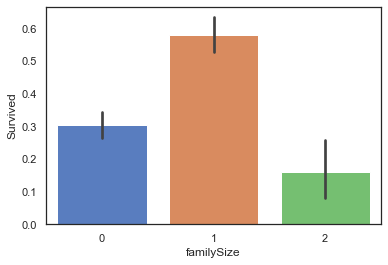

In [19]:
def family_size(num):
    if num == 1:
        return 0
    elif (num >= 2) & (num <= 4):
        return 1
    else:
        return 2
data['familySize'] = data['familyNum'].apply(family_size)
print(data['familySize'].value_counts())
sns.barplot(x='familySize', y='Survived', data=data)

<AxesSubplot:xlabel='deck', ylabel='Survived'>

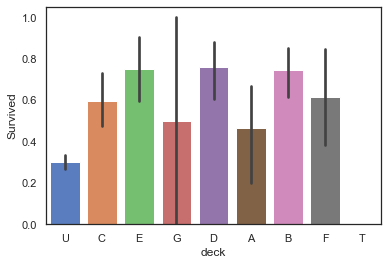

In [20]:
# Cabin 第一字母表示客艙類型，不同客艙表示不同的客群
data['deck'] = data['Cabin'].apply(lambda x: x[0])
sns.barplot(x='deck', y='Survived', data=data)

<AxesSubplot:xlabel='ticketCount', ylabel='Survived'>

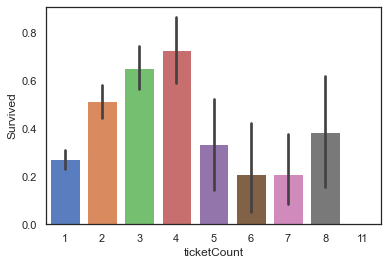

In [21]:
# Ticket 種類數量也可能與存活率有關
ticketDict = dict(data['Ticket'].value_counts())
data['ticketCount'] = data['Ticket'].map(ticketDict)
sns.barplot(x='ticketCount', y='Survived', data=data)

<AxesSubplot:xlabel='ticketGroup', ylabel='Survived'>

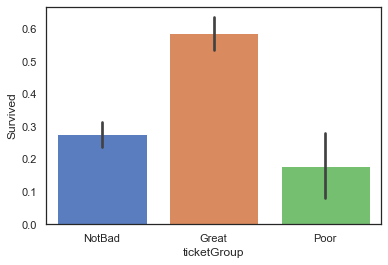

In [22]:
def ticket_group(count):
    if (count >= 2) & (count <= 4):
        return 'Great'
    elif (count == 1) | (count == 5) | (count == 8):
        return 'NotBad'
    else:
        return 'Poor'

data['ticketGroup'] = data['ticketCount'].apply(ticket_group)
sns.barplot(x='ticketGroup', y='Survived', data=data)

In [23]:
# Age 缺失值填補，利用原有特徵加上新增特徵做預測
from sklearn.preprocessing import StandardScaler
temp = pd.get_dummies(data[['Pclass','Sex','SibSp','Parch','Fare','Embarked','title','familySize','deck','ticketCount','familyNum','ticketGroup']])
temp = StandardScaler().fit_transform(temp)

AgeKnown=temp[data['Age'].notnull()]
AgeUnKnown=temp[data['Age'].isnull()]

AgeKnown_X=AgeKnown
AgeKnown_y=data[data['Age'].notnull()]['Age']

AgeUnKnown_X=AgeUnKnown

# 利用隨機森林模型做 Age 預測
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)
print('The score of regression model:', rfr.score(AgeKnown_X,AgeKnown_y))

AgeUnKnown_y = rfr.predict(AgeUnKnown_X)
data.loc[data['Age'].isnull(),'Age'] = AgeUnKnown_y


The score of regression model: 0.7740600742019357


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  deck         1309 non-null   object 
 16  ticketCount  1309 non-null   int64  
 17  ticketGroup  1309 non-null   object 
dtypes: float64(3), int64(7), object(8)
memory usage:

##### 完成補值

In [25]:
# 先人工刪去不必要的特徵
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# 刪除較不相關的特徵
print(data.corr()['Survived'].sort_values())
data = data.drop(['SibSp','familyNum'], axis=1)

Pclass        -0.338481
Age           -0.077162
SibSp         -0.035322
familyNum      0.016639
ticketCount    0.064962
Parch          0.081629
familySize     0.108631
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


In [26]:
data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,title,familySize,deck,ticketCount,ticketGroup
0,0.0,3,male,22.000000,0,7.2500,S,Mr,1,U,1,NotBad
1,1.0,1,female,38.000000,0,71.2833,C,Mrs,1,C,2,Great
2,1.0,3,female,26.000000,0,7.9250,S,Miss,0,U,1,NotBad
3,1.0,1,female,35.000000,0,53.1000,S,Mrs,1,C,2,Great
4,0.0,3,male,35.000000,0,8.0500,S,Mr,0,U,1,NotBad
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,30.071152,0,8.0500,S,Mr,0,U,1,NotBad
1305,NaN,1,female,39.000000,0,108.9000,C,Royalty,0,C,3,Great
1306,NaN,3,male,38.500000,0,7.2500,S,Mr,0,U,1,NotBad
1307,NaN,3,male,30.071152,0,8.0500,S,Mr,0,U,1,NotBad


## 4. 建立模型

In [27]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

x = pd.get_dummies(x)

trainNum = 891

###### 我們想測試以下模型
* SVC
* Decision Tree
* Extra Trees
* Gradient Boosting
* Random Forest
* KNN
* Logistic Regression
* Linear Discriminant Analysis


In [28]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

In [29]:
# 彙整全部的演算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [30]:
# 將學習結果交叉驗證
cv_results=[]
for i in classifiers:
    cv_results.append(cross_val_score(i,x.loc[:trainNum-1,:],y[:trainNum],scoring='accuracy',cv=5,n_jobs=-1))

In [31]:
cv_means=[]
cv_std=[]
for i in cv_results:
    cv_means.append(i.mean())
    cv_std.append(i.std())

In [32]:
df_cv = pd.DataFrame({'cv_means':cv_means,
                     'cv_std':cv_std,
                      'means/std':np.array(cv_means)/np.array(cv_std),
                     'algorithm':['SVC','DecisionTree','RandomForest','ExtraTree','GDBC','KNN','LogisticRegression','LDA']})
df_cv

,cv_means,cv_std,means/std,algorithm
0,0.671257,0.046436,14.455620,SVC
1,0.780051,0.028479,27.390252,DecisionTree
2,0.811437,0.028624,28.348255,RandomForest
3,0.802479,0.026121,30.721758,ExtraTree
4,0.819315,0.022210,36.889680,GDBC
5,0.716094,0.032612,21.957870,KNN
6,0.828291,0.015635,52.977573,LogisticRegression
7,0.823803,0.021995,37.454866,LDA


##### LogisticRegression 和 GDBC 表現最好

## 5. 模型優化

In [33]:
# GradientBoostingClassifier模型
GDBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGDBC = GridSearchCV(GDBC,param_grid = gb_param_grid, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGDBC.fit(x.loc[:trainNum-1,:],y[:trainNum])

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.0s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [34]:
# LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=5, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(x.loc[:trainNum-1,:],y[:trainNum])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [35]:
print('modelgsGDBC模型得分為：%.3f'%modelgsGDBC.best_score_)

print('modelgsLR模型得分為：%.3f'%modelgsLR.best_score_)

modelgsGDBC模型得分為：0.838
modelgsLR模型得分為：0.828


## 6. 模型預測

In [36]:
y_pred = modelgsGDBC.best_estimator_.predict(x.loc[trainNum:,:]).astype('int64')
submit = pd.DataFrame({'PassengerId':test['PassengerId'],
                       'Survived':y_pred
                      })
submit.to_csv('./submission.csv',index=False)